In [1]:
# importer stuff
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base
from parafac2 import parafac2_als
import utils

%matplotlib notebook

## Load data

In [2]:
X = loadmat('datasets/gcwine.mat')['gcwine']['data'][0][0]
X = X/np.linalg.norm(X)
X_list = [X[..., k] for k in range(X.shape[-1])]

## Decompose with PARAFAC2

In [3]:
P_k, F, A, D_k = parafac2_als(X_list, 3)

   0: loss is 0.93, improvement is 0.90
   1: loss is 382.89, improvement is -410.99
   2: loss is 0.93, improvement is 1.00
   3: loss is 384.24, improvement is -413.30
   4: loss is 0.93, improvement is 1.00
   5: loss is 380.80, improvement is -409.66
   6: loss is 0.93, improvement is 1.00
   7: loss is 377.89, improvement is -406.43
   8: loss is 0.93, improvement is 1.00
   9: loss is 375.71, improvement is -403.98
  10: loss is 0.93, improvement is 1.00
  11: loss is 374.05, improvement is -402.11
  12: loss is 0.93, improvement is 1.00
  13: loss is 372.75, improvement is -400.65
  14: loss is 0.93, improvement is 1.00
  15: loss is 371.70, improvement is -399.46
  16: loss is 0.93, improvement is 1.00
  17: loss is 370.84, improvement is -398.49
  18: loss is 0.93, improvement is 1.00
  19: loss is 370.12, improvement is -397.67
  20: loss is 0.93, improvement is 1.00
  21: loss is 369.52, improvement is -396.98
  22: loss is 0.93, improvement is 1.00
  23: loss is 369.00, imp

 233: loss is 367.96, improvement is -394.85
 234: loss is 0.93, improvement is 1.00
 235: loss is 367.96, improvement is -394.85
 236: loss is 0.93, improvement is 1.00
 237: loss is 367.97, improvement is -394.86
 238: loss is 0.93, improvement is 1.00
 239: loss is 367.98, improvement is -394.87
 240: loss is 0.93, improvement is 1.00
 241: loss is 367.99, improvement is -394.88
 242: loss is 0.93, improvement is 1.00
 243: loss is 368.00, improvement is -394.89
 244: loss is 0.93, improvement is 1.00
 245: loss is 368.01, improvement is -394.90
 246: loss is 0.93, improvement is 1.00
 247: loss is 368.02, improvement is -394.91
 248: loss is 0.93, improvement is 1.00
 249: loss is 368.02, improvement is -394.91
 250: loss is 0.93, improvement is 1.00
 251: loss is 368.03, improvement is -394.92
 252: loss is 0.93, improvement is 1.00
 253: loss is 368.04, improvement is -394.93
 254: loss is 0.93, improvement is 1.00
 255: loss is 368.05, improvement is -394.94
 256: loss is 0.93, 

 439: loss is 368.23, improvement is -395.11
 440: loss is 0.93, improvement is 1.00
 441: loss is 368.23, improvement is -395.11
 442: loss is 0.93, improvement is 1.00
 443: loss is 368.22, improvement is -395.10
 444: loss is 0.93, improvement is 1.00
 445: loss is 368.22, improvement is -395.10
 446: loss is 0.93, improvement is 1.00
 447: loss is 368.22, improvement is -395.10
 448: loss is 0.93, improvement is 1.00
 449: loss is 368.22, improvement is -395.10
 450: loss is 0.93, improvement is 1.00
 451: loss is 368.22, improvement is -395.10
 452: loss is 0.93, improvement is 1.00
 453: loss is 368.22, improvement is -395.10
 454: loss is 0.93, improvement is 1.00
 455: loss is 368.22, improvement is -395.10
 456: loss is 0.93, improvement is 1.00
 457: loss is 368.21, improvement is -395.09
 458: loss is 0.93, improvement is 1.00
 459: loss is 368.21, improvement is -395.09
 460: loss is 0.93, improvement is 1.00
 461: loss is 368.21, improvement is -395.09
 462: loss is 0.93, 

 646: loss is 0.93, improvement is 1.00
 647: loss is 367.99, improvement is -394.86
 648: loss is 0.93, improvement is 1.00
 649: loss is 367.99, improvement is -394.85
 650: loss is 0.93, improvement is 1.00
 651: loss is 367.98, improvement is -394.85
 652: loss is 0.93, improvement is 1.00
 653: loss is 367.98, improvement is -394.85
 654: loss is 0.93, improvement is 1.00
 655: loss is 367.98, improvement is -394.85
 656: loss is 0.93, improvement is 1.00
 657: loss is 367.98, improvement is -394.84
 658: loss is 0.93, improvement is 1.00
 659: loss is 367.97, improvement is -394.84
 660: loss is 0.93, improvement is 1.00
 661: loss is 367.97, improvement is -394.84
 662: loss is 0.93, improvement is 1.00
 663: loss is 367.97, improvement is -394.83
 664: loss is 0.93, improvement is 1.00
 665: loss is 367.97, improvement is -394.83
 666: loss is 0.93, improvement is 1.00
 667: loss is 367.96, improvement is -394.83
 668: loss is 0.93, improvement is 1.00
 669: loss is 367.96, imp

 848: loss is 0.93, improvement is 1.00
 849: loss is 367.71, improvement is -394.57
 850: loss is 0.93, improvement is 1.00
 851: loss is 367.71, improvement is -394.56
 852: loss is 0.93, improvement is 1.00
 853: loss is 367.71, improvement is -394.56
 854: loss is 0.93, improvement is 1.00
 855: loss is 367.70, improvement is -394.56
 856: loss is 0.93, improvement is 1.00
 857: loss is 367.70, improvement is -394.55
 858: loss is 0.93, improvement is 1.00
 859: loss is 367.70, improvement is -394.55
 860: loss is 0.93, improvement is 1.00
 861: loss is 367.69, improvement is -394.55
 862: loss is 0.93, improvement is 1.00
 863: loss is 367.69, improvement is -394.55
 864: loss is 0.93, improvement is 1.00
 865: loss is 367.69, improvement is -394.54
 866: loss is 0.93, improvement is 1.00
 867: loss is 367.69, improvement is -394.54
 868: loss is 0.93, improvement is 1.00
 869: loss is 367.68, improvement is -394.54
 870: loss is 0.93, improvement is 1.00
 871: loss is 367.68, imp

## Plot A

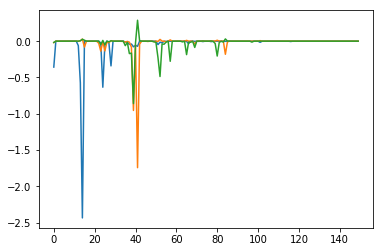

In [4]:
plt.figure()
plt.plot(A)
plt.show()

## Plot B

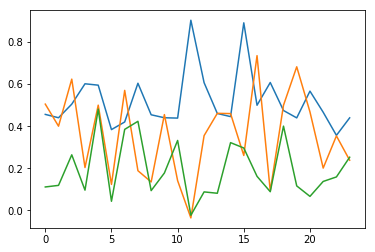

In [5]:
C = np.diagonal(D_k)
plt.figure()
plt.plot(C)
plt.show()

## Plot first F_k slice

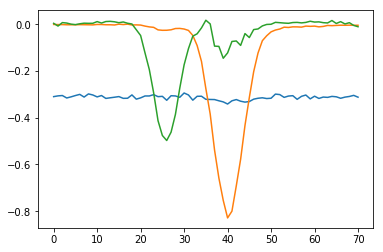

In [6]:
F_k = [P @ F for P in P_k]
plt.figure()
plt.plot(F_k[0])
plt.show()

## Plot them together

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


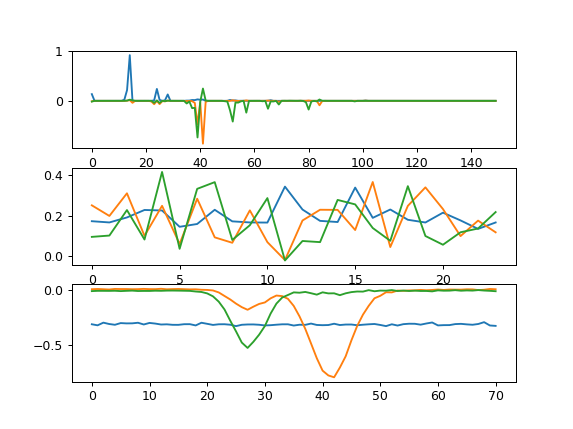

interactive(children=(IntSlider(value=11, description='k', max=23), Output()), _dom_classes=('widget-interact'…

In [8]:
fig, ax = plt.subplots(3, 1)

from ipywidgets import interact, interactive, fixed, interact_manual

(A_, C_), *_ = utils.prepare_for_comparison((A, C))

ax[0].plot(A_)
ax[1].plot(C_)

@interact(k=(0,len(F_k)-1))
def plot_F(k):
    #(F_k_,), *_ = utils.prepare_for_comparison((F_k[k],))
    ax[2].clear()
    ax[2].plot(F_k[k])